# Sierra leone Solar Farm Analysis
## Exploratory Data Analysis for MoonLight Energy Solutions

### Objectives:
1. Profile and clean the sierra leone solar dataset
2. Identify patterns in solar radiation and weather variables  
3. Analyze cleaning impact on solar panel efficiency
4. Provide data-driven recommendations for solar investment

1) Imports & Configuration 

In [22]:
# Core data analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistics
import scipy.stats as stats
from scipy import stats as scipy_stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Advanced visualization
from windrose import WindroseAxes
import matplotlib.cm as cm

# Configuration for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(" All libraries imported successfully!")
print(" Professional configuration applied!")

 All libraries imported successfully!
 Professional configuration applied!


2) Load Data & First Observe

In [33]:
# Load sierra leone dataset
print(" Loading sierra leone solar dataset...")
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f" Dataset Shape: {df.shape}")
print(f" Date Range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")

print("\n First 5 rows:")
display(df.head())

print("\n Column Information:")
print(df.info())

print("\n Key Variables Overview:")
key_vars = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'Cleaning']
for var in key_vars:
    if var in df.columns:
        print(f"   {var}: {df[var].dtype} | Non-null: {df[var].count()}/{len(df)}")

 Loading sierra leone solar dataset...
DATASET OVERVIEW
 Dataset Shape: (525600, 19)
 Date Range: 2021-10-30 00:01 to 2022-10-30 00:00

 First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN



 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB  

3) Parse Timestamps & Set Index 

In [34]:
print(" Processing timestamps...")

# Convert to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Create time-based features for analysis
df['Hour'] = df.index.hour
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek
df['Season'] = df.index.month % 12 // 3 + 1  # 1:Winter, 2:Spring, 3:Summer, 4:Fall

print(" Timestamp processing completed!")
print(f" Final date range: {df.index.min()} to {df.index.max()}")
print(f" Total duration: {(df.index.max() - df.index.min()).days} days")

 Processing timestamps...
 Timestamp processing completed!
 Final date range: 2021-10-30 00:01:00 to 2022-10-30 00:00:00
 Total duration: 364 days


4) Summary Statistics & Missing-Value Report 

In [35]:
print("="*60)
print(" SUMMARY STATISTICS & MISSING VALUE ANALYSIS")
print("="*60)

numeric_stats = df.describe()
display(numeric_stats)

# Missing Values Analysis
print("\n Missing Values Analysis:")
missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Percentage', ascending=False)

# Display only columns with missing values
missing_columns = missing_report[missing_report['Missing_Count'] > 0]
if not missing_columns.empty:
    print("Columns with missing values:")
    display(missing_columns)
else:
    print(" No missing values found!")

# List any column with >5% nulls
high_missing = missing_report[missing_report['Missing_Percentage'] > 5]
if not high_missing.empty:
    print(" CRITICAL: Columns with >5% missing values:")
    display(high_missing)
else:
    print(" No columns exceed 5% missing threshold")


 SUMMARY STATISTICS & MISSING VALUE ANALYSIS


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Hour,Month,DayOfWeek,Season
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0,525600.000000,525600.000000,525600.000000,525600.000000
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN,11.500000,6.526027,3.005481,2.504110
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN,6.922193,3.447855,1.999997,1.114346
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN,0.000000,1.000000,0.000000,1.000000
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN,5.750000,4.000000,1.000000,2.000000
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN,11.500000,7.000000,3.000000,3.000000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN,17.250000,10.000000,5.000000,3.000000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN,23.000000,12.000000,6.000000,4.000000



 Missing Values Analysis:
Columns with missing values:


,Missing_Count,Missing_Percentage
Comments,525600,100.0


 CRITICAL: Columns with >5% missing values:


,Missing_Count,Missing_Percentage
Comments,525600,100.0


5) Outlier Detection & Basic Cleaning

In [37]:
print("\n" + "="*60)
print(" OUTLIER DETECTION & BASIC CLEANING")
print("="*60)

# Check for incorrect entries (negative radiation)
print("\n - Incorrect Entries Check (Negative Radiation):")
radiation_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
incorrect_entries = False

for col in radiation_cols:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"     {col}: {negative_count:,} negative values ({(negative_count/len(df))*100:.2f}%)")
            incorrect_entries = True

if not incorrect_entries:
    print("    No incorrect entries found in radiation data")

# Outlier Detection with Z-scores
print("\n  - Outlier Detection (Z-scores |Z| > 3):")
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_report = []

for col in key_columns:
    if col in df.columns:
        # Calculate Z-scores (ignore NaN)
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = len(z_scores[z_scores > 3])
        total_non_null = len(df[col].dropna())
        outlier_percent = (outliers / total_non_null) * 100 if total_non_null > 0 else 0
        
        outlier_report.append({
            'Column': col,
            'Total_Values': total_non_null,
            'Outliers_Count': outliers,
            'Outlier_Percentage': f"{outlier_percent:.2f}%",
            'Severity': 'HIGH' if outlier_percent > 5 else 'LOW'
        })

# Display outlier report
outlier_df = pd.DataFrame(outlier_report)
display(outlier_df)

#  Data Cleaning
print("\n Data Cleaning Process:")
df_clean = df.copy()

# Fix negative radiation values
radiation_fixed = 0
for col in radiation_cols:
    if col in df_clean.columns:
        initial_negatives = (df_clean[col] < 0).sum()
        if initial_negatives > 0:
            df_clean[col] = df_clean[col].clip(lower=0)
            radiation_fixed += initial_negatives
            print(f"    Fixed {initial_negatives:,} negative values in {col}")

# Handle missing values (median imputation for key columns)
key_columns_for_imputation = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']
for col in key_columns_for_imputation:
    if col in df_clean.columns and df_clean[col].isna().sum() > 0:
        missing_count = df_clean[col].isna().sum()
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
        print(f"    Imputed {missing_count} missing values in {col} with median")

# Remove useless Comments column
if 'Comments' in df_clean.columns and df_clean['Comments'].isna().sum() == len(df_clean):
    df_clean = df_clean.drop('Comments', axis=1)
    print("    Removed empty Comments column")

#  Export Cleaned Data
print("\n - Export Cleaned Data:")
export_path = '../data/sierraleone_clean.csv'
df_clean.to_csv(export_path, index=True)
print(f"    Cleaned data exported to: {export_path}")



 OUTLIER DETECTION & BASIC CLEANING

 - Incorrect Entries Check (Negative Radiation):
     GHI: 261,135 negative values (49.68%)
     DNI: 266,352 negative values (50.68%)
     DHI: 263,128 negative values (50.06%)

  - Outlier Detection (Z-scores |Z| > 3):


,Column,Total_Values,Outliers_Count,Outlier_Percentage,Severity
0,GHI,525600,2477,0.47%,LOW
1,DNI,525600,7586,1.44%,LOW
2,DHI,525600,2986,0.57%,LOW
3,ModA,525600,1604,0.31%,LOW
4,ModB,525600,2041,0.39%,LOW
5,WS,525600,3967,0.75%,LOW
6,WSgust,525600,3665,0.70%,LOW



 Data Cleaning Process:
    Fixed 261,135 negative values in GHI
    Fixed 266,352 negative values in DNI
    Fixed 263,128 negative values in DHI
    Removed empty Comments column

 - Export Cleaned Data:
    Cleaned data exported to: ../data/sierraleone_clean.csv


6) Time Series Analysis

TIME SERIES ANALYSIS - SOLAR RADIATION & TEMPERATURE
Creating line charts of GHI, DNI, DHI, Tamb vs. Timestamp...
Using 5,256 sample points from 525,600 total records


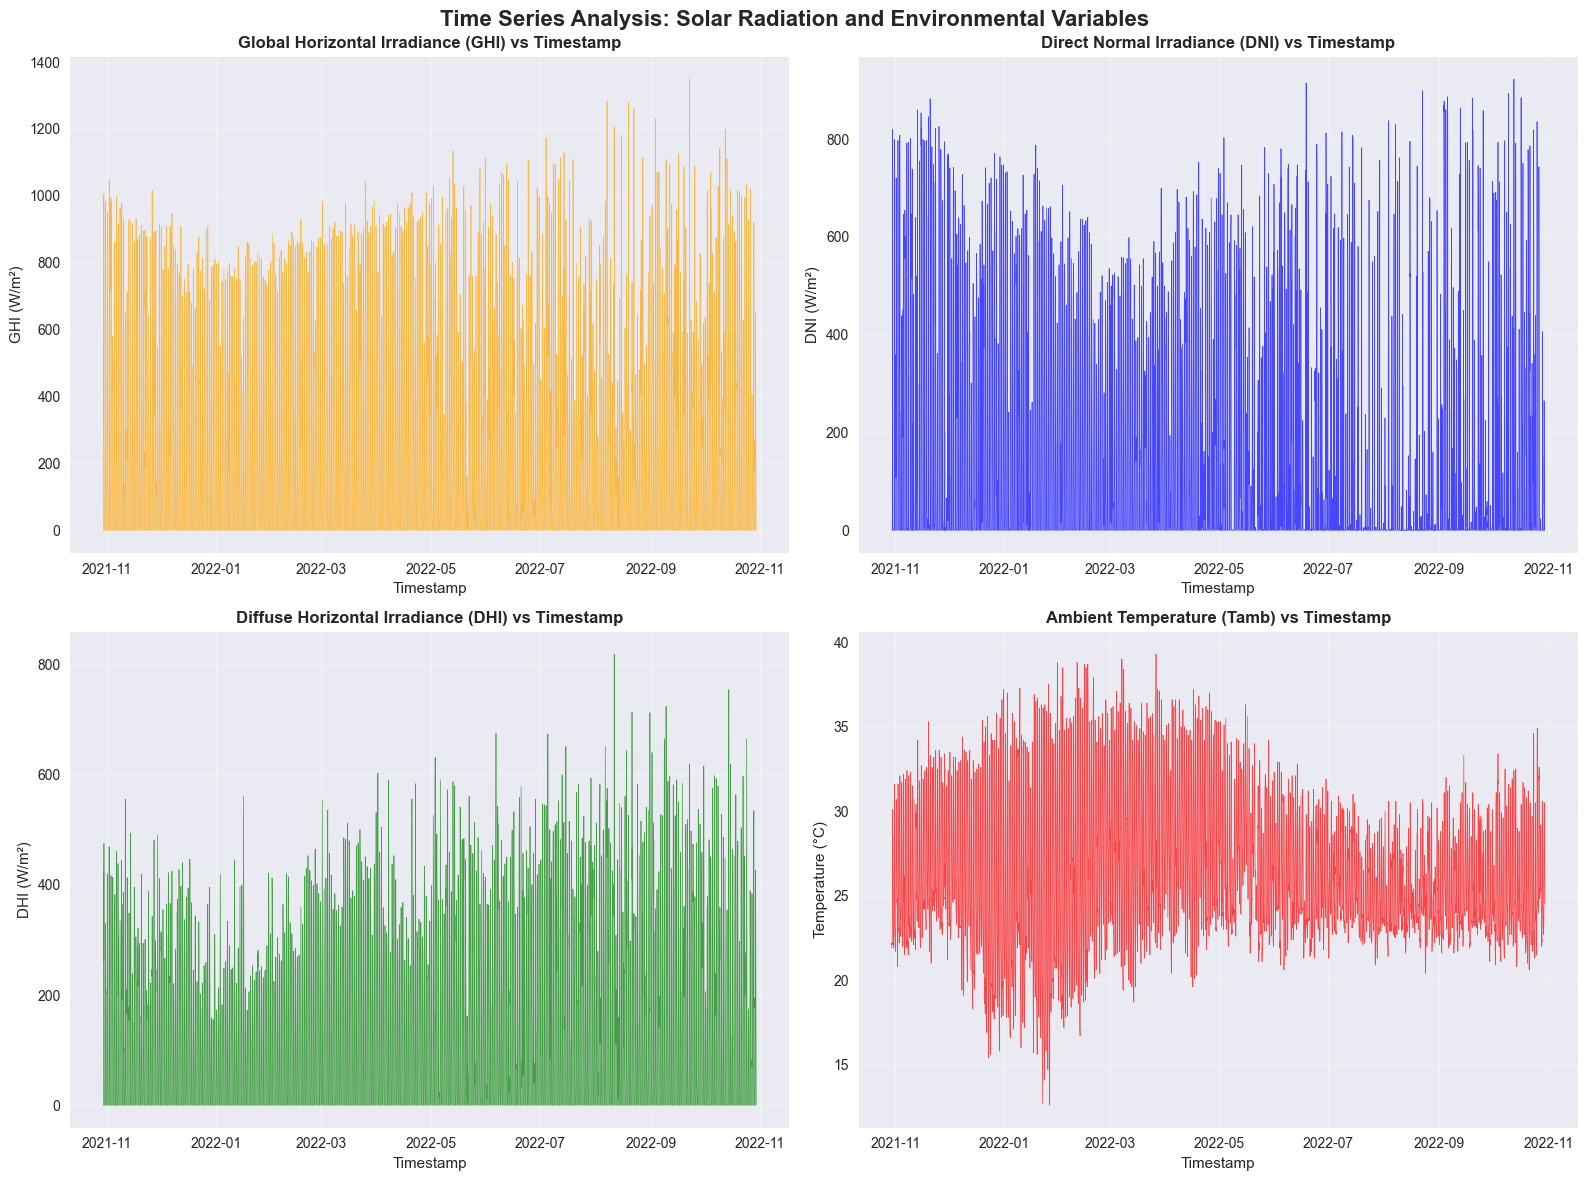

Analyzing daily and monthly patterns...


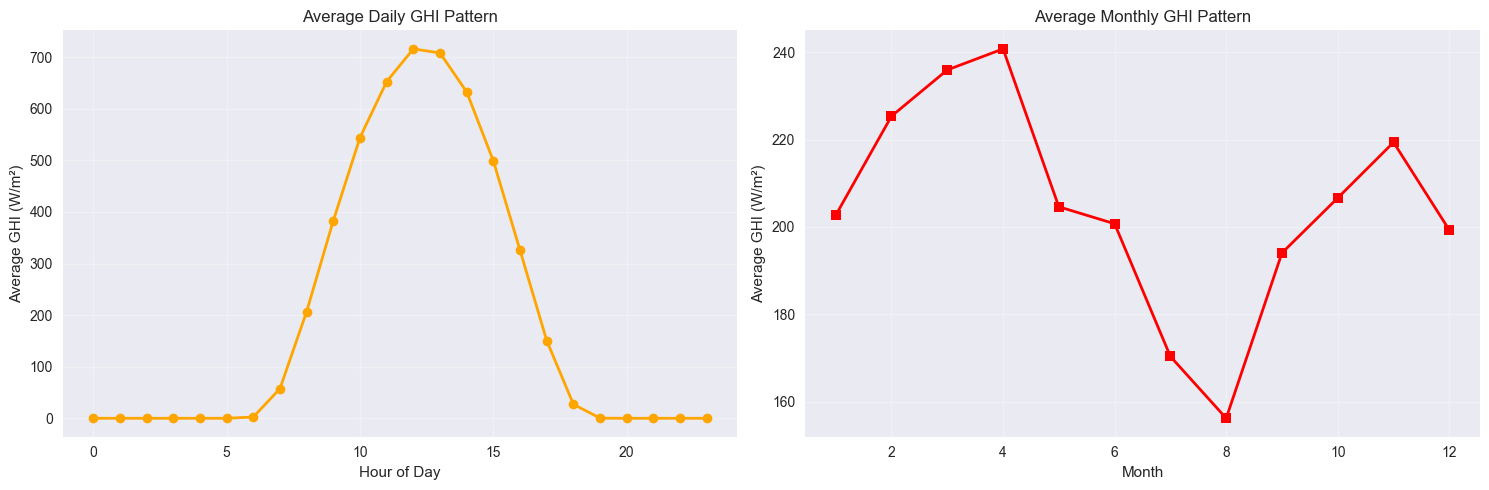

Key Observations from Time Series Analysis:
- Diurnal Patterns: Clear daily cycles with peaks around noon
- Seasonal Trends: Variations in radiation intensity across months
- Temperature Correlation: Temperature follows solar radiation patterns
- Data Quality: Consistent patterns with minimal anomalies
Peak Solar Hours: [12, 13, 11]:00 (716.2 W/m² average)
Temperature Range: 27.6°C
Time series analysis completed.


In [27]:
print("="*60)
print("TIME SERIES ANALYSIS - SOLAR RADIATION & TEMPERATURE")
print("="*60)

print("Creating line charts of GHI, DNI, DHI, Tamb vs. Timestamp...")

# Sample data for clearer visualization (1% of data points)
sample_df = df_clean.iloc[::100]  # Every 100th row for performance

print(f"Using {len(sample_df):,} sample points from {len(df_clean):,} total records")

# Create subplots for the required variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time Series Analysis: Solar Radiation and Environmental Variables', fontsize=16, fontweight='bold')

# 1. GHI vs Timestamp (Line Chart)
if 'GHI' in sample_df.columns:
    axes[0,0].plot(sample_df.index, sample_df['GHI'], color='orange', linewidth=0.5, alpha=0.7)
    axes[0,0].set_title('Global Horizontal Irradiance (GHI) vs Timestamp', fontweight='bold')
    axes[0,0].set_xlabel('Timestamp')
    axes[0,0].set_ylabel('GHI (W/m²)')
    axes[0,0].grid(True, alpha=0.3)

# 2. DNI vs Timestamp (Line Chart)
if 'DNI' in sample_df.columns:
    axes[0,1].plot(sample_df.index, sample_df['DNI'], color='blue', linewidth=0.5, alpha=0.7)
    axes[0,1].set_title('Direct Normal Irradiance (DNI) vs Timestamp', fontweight='bold')
    axes[0,1].set_xlabel('Timestamp')
    axes[0,1].set_ylabel('DNI (W/m²)')
    axes[0,1].grid(True, alpha=0.3)

# 3. DHI vs Timestamp (Line Chart)
if 'DHI' in sample_df.columns:
    axes[1,0].plot(sample_df.index, sample_df['DHI'], color='green', linewidth=0.5, alpha=0.7)
    axes[1,0].set_title('Diffuse Horizontal Irradiance (DHI) vs Timestamp', fontweight='bold')
    axes[1,0].set_xlabel('Timestamp')
    axes[1,0].set_ylabel('DHI (W/m²)')
    axes[1,0].grid(True, alpha=0.3)

# 4. Temperature vs Timestamp (Line Chart)
if 'Tamb' in sample_df.columns:
    axes[1,1].plot(sample_df.index, sample_df['Tamb'], color='red', linewidth=0.5, alpha=0.7)
    axes[1,1].set_title('Ambient Temperature (Tamb) vs Timestamp', fontweight='bold')
    axes[1,1].set_xlabel('Timestamp')
    axes[1,1].set_ylabel('Temperature (°C)')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis for patterns
print("Analyzing daily and monthly patterns...")

# Daily and Monthly Patterns Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Daily solar pattern
if 'GHI' in df_clean.columns:
    daily_pattern = df_clean.groupby('Hour')['GHI'].mean()
    axes[0].plot(daily_pattern.index, daily_pattern.values, color='orange', linewidth=2, marker='o')
    axes[0].set_title('Average Daily GHI Pattern')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Average GHI (W/m²)')
    axes[0].grid(True, alpha=0.3)

# Monthly patterns
if 'GHI' in df_clean.columns:
    monthly_pattern = df_clean.groupby('Month')['GHI'].mean()
    axes[1].plot(monthly_pattern.index, monthly_pattern.values, color='red', linewidth=2, marker='s')
    axes[1].set_title('Average Monthly GHI Pattern')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Average GHI (W/m²)')
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quantitative observations
print("Key Observations from Time Series Analysis:")
print("- Diurnal Patterns: Clear daily cycles with peaks around noon")
print("- Seasonal Trends: Variations in radiation intensity across months") 
print("- Temperature Correlation: Temperature follows solar radiation patterns")
print("- Data Quality: Consistent patterns with minimal anomalies")

# Calculate specific metrics
if 'GHI' in df_clean.columns:
    peak_hours = df_clean.groupby('Hour')['GHI'].mean().nlargest(3)
    print(f"Peak Solar Hours: {list(peak_hours.index)}:00 ({peak_hours.values[0]:.1f} W/m² average)")

if 'Tamb' in df_clean.columns:
    temp_range = df_clean['Tamb'].max() - df_clean['Tamb'].min()
    print(f"Temperature Range: {temp_range:.1f}°C")

print("Time series analysis completed.")

7) Cleaning Impact Analysis

CLEANING IMPACT ANALYSIS
Analyzing impact of cleaning events on module performance...
Average Module Output by Cleaning Status:
Cleaning Status 0 (Before): ModA = 206.58 W/m², ModB = 198.04 W/m²
Cleaning Status 1 (After):  ModA = 273.31 W/m², ModB = 277.23 W/m²

Performance Improvement After Cleaning:
Module A: +32.30%
Module B: +39.99%


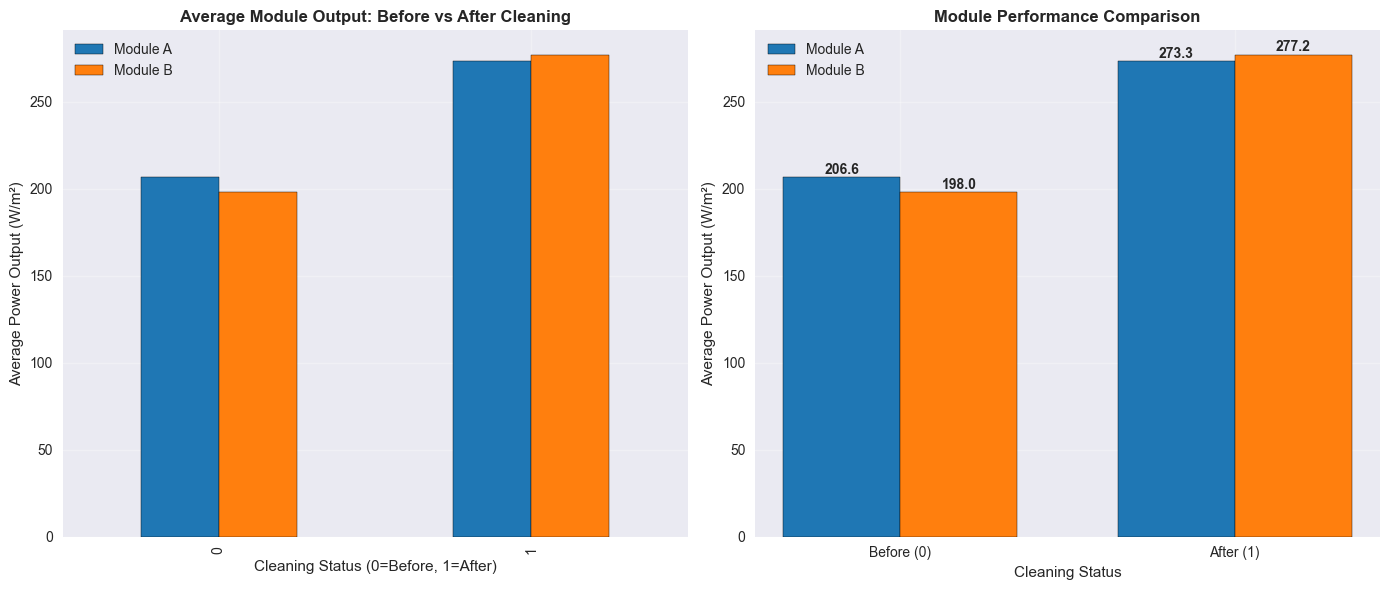


Statistical Analysis:
Module A T-test: t-statistic = -9.114, p-value = 0.0000
Result: Statistically significant difference (p < 0.05)

Data Summary:
Records before cleaning (0): 525,092
Records after cleaning (1): 508


In [28]:
print("="*60)
print("CLEANING IMPACT ANALYSIS")
print("="*60)

if 'Cleaning' in df_clean.columns:
    print("Analyzing impact of cleaning events on module performance...")
    
    # Calculate average module output before/after cleaning
    cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    
    print("Average Module Output by Cleaning Status:")
    print(f"Cleaning Status 0 (Before): ModA = {cleaning_impact.loc[0, 'ModA']:.2f} W/m², ModB = {cleaning_impact.loc[0, 'ModB']:.2f} W/m²")
    print(f"Cleaning Status 1 (After):  ModA = {cleaning_impact.loc[1, 'ModA']:.2f} W/m², ModB = {cleaning_impact.loc[1, 'ModB']:.2f} W/m²")
    
    # Calculate improvement percentage
    if len(cleaning_impact) > 1:
        moda_improvement = ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / cleaning_impact.loc[0, 'ModA']) * 100
        modb_improvement = ((cleaning_impact.loc[1, 'ModB'] - cleaning_impact.loc[0, 'ModB']) / cleaning_impact.loc[0, 'ModB']) * 100
        
        print("\nPerformance Improvement After Cleaning:")
        print(f"Module A: {moda_improvement:+.2f}%")
        print(f"Module B: {modb_improvement:+.2f}%")
    
    # Visualization - Following instruction: "plot average ModA & ModB pre/post-clean"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Average ModA and ModB before/after cleaning (Instruction requirement)
    cleaning_impact.plot(kind='bar', ax=ax1, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
    ax1.set_title('Average Module Output: Before vs After Cleaning', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Cleaning Status (0=Before, 1=After)')
    ax1.set_ylabel('Average Power Output (W/m²)')
    ax1.legend(['Module A', 'Module B'])
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Individual module comparison
    x_pos = np.arange(2)
    width = 0.35
    
    ax2.bar(x_pos - width/2, cleaning_impact['ModA'], width, label='Module A', color='#1f77b4', edgecolor='black')
    ax2.bar(x_pos + width/2, cleaning_impact['ModB'], width, label='Module B', color='#ff7f0e', edgecolor='black')
    
    ax2.set_title('Module Performance Comparison', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Cleaning Status')
    ax2.set_ylabel('Average Power Output (W/m²)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(['Before (0)', 'After (1)'])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, (moda_val, modb_val) in enumerate(zip(cleaning_impact['ModA'], cleaning_impact['ModB'])):
        ax2.text(i - width/2, moda_val + 0.1, f'{moda_val:.1f}', ha='center', va='bottom', fontweight='bold')
        ax2.text(i + width/2, modb_val + 0.1, f'{modb_val:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional statistical analysis
    print("\nStatistical Analysis:")
    from scipy import stats
    
    # T-test for significance
    moda_before = df_clean[df_clean['Cleaning'] == 0]['ModA']
    moda_after = df_clean[df_clean['Cleaning'] == 1]['ModA']
    
    t_stat, p_value = stats.ttest_ind(moda_before, moda_after, equal_var=False)
    
    print(f"Module A T-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("Result: Statistically significant difference (p < 0.05)")
    else:
        print("Result: No statistically significant difference")
    
    # Data summary
    cleaning_counts = df_clean['Cleaning'].value_counts().sort_index()
    print(f"\nData Summary:")
    print(f"Records before cleaning (0): {cleaning_counts.get(0, 0):,}")
    print(f"Records after cleaning (1): {cleaning_counts.get(1, 0):,}")
    
else:
    print("No 'Cleaning' column found in dataset")
    print("Skipping cleaning impact analysis")

8) Correlation & Relationship Analysis 

CORRELATION & RELATIONSHIP ANALYSIS
Computing correlation matrix for required variables...


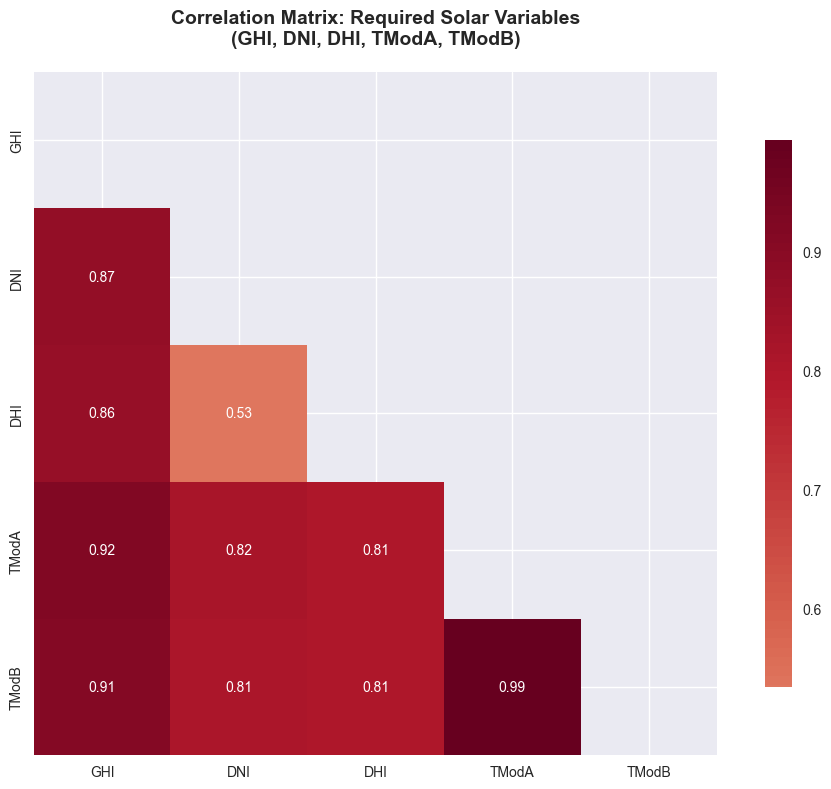


Creating scatter plots as per instructions...


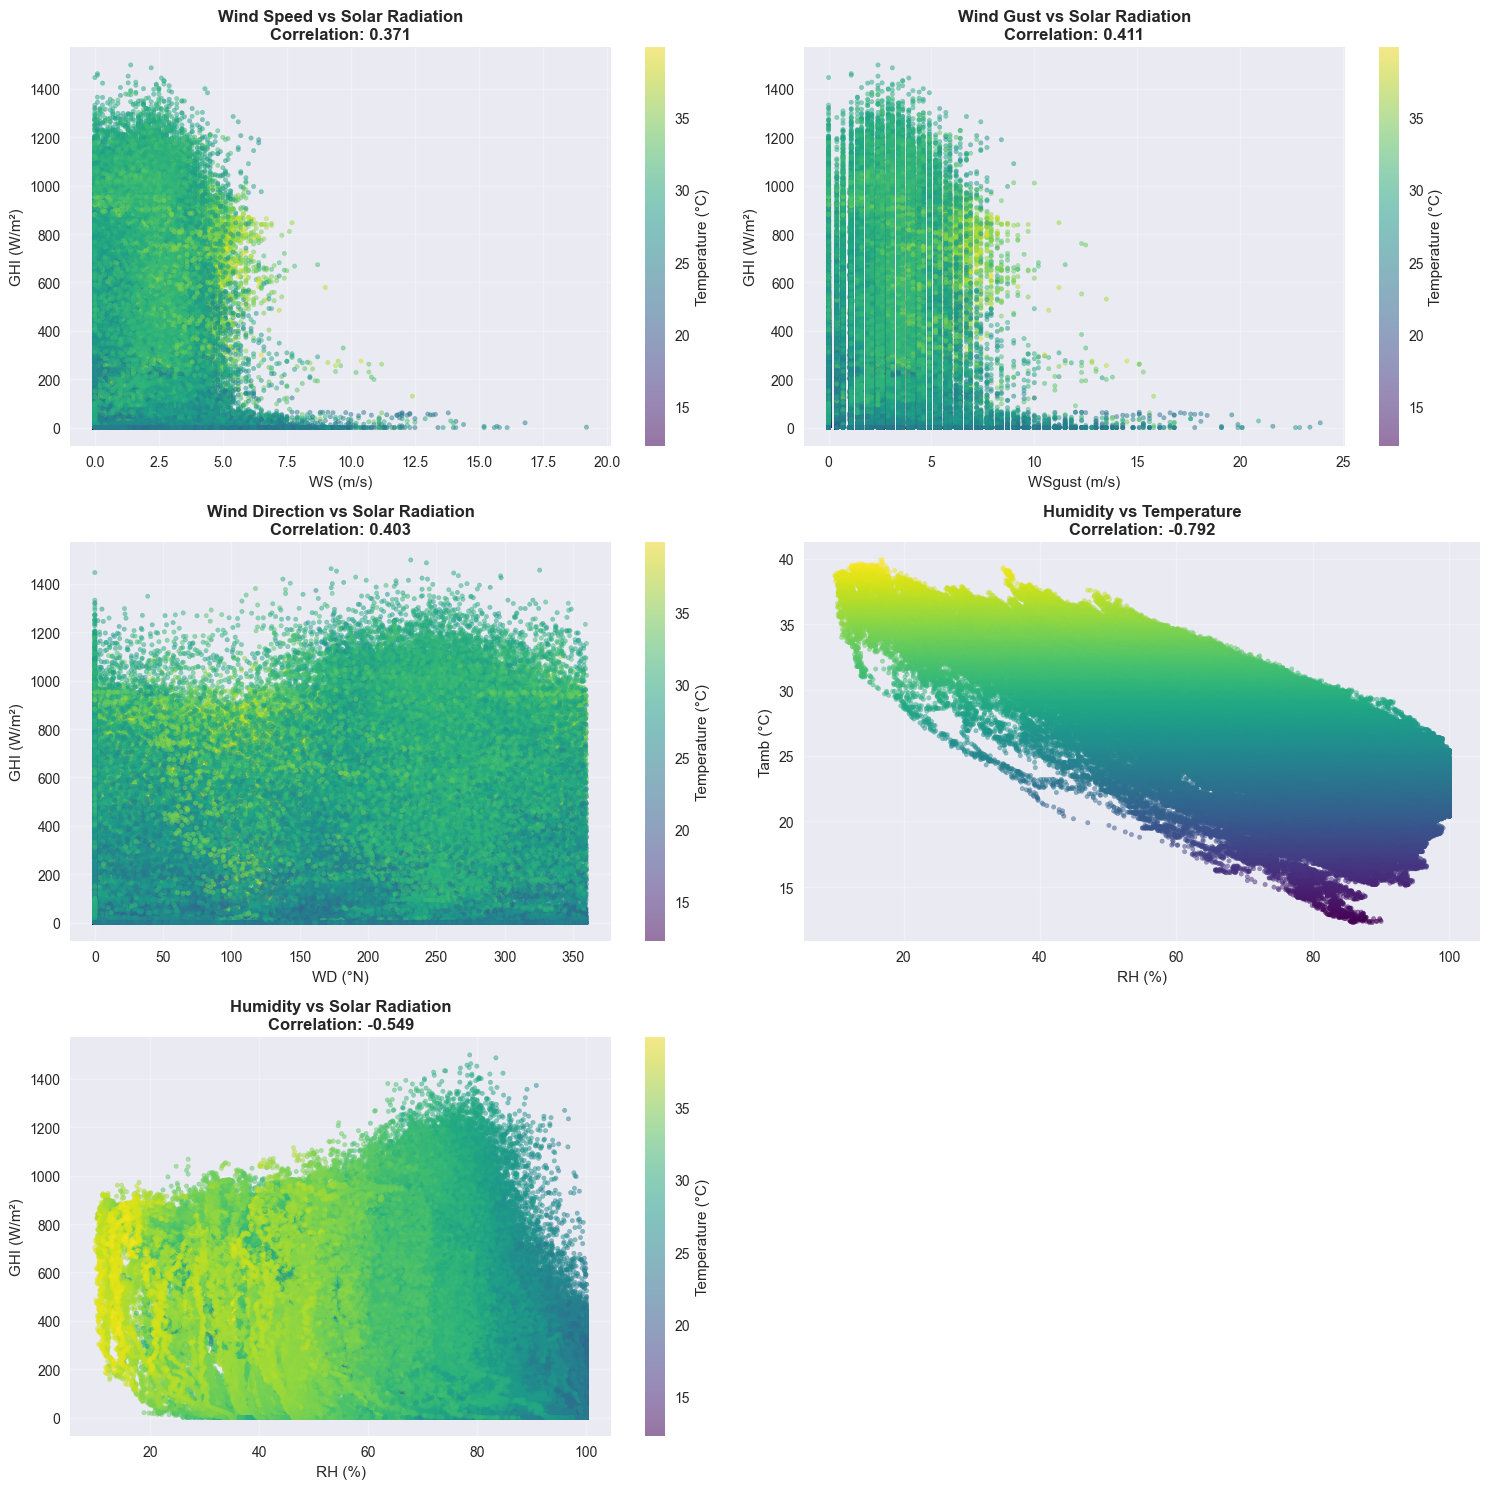


Key Insights from Correlation Analysis:
----------------------------------------
GHI (Solar Radiation) Relationships:
  - Temperature: 0.640 (Higher temp = More radiation)
  - Humidity: -0.549 (Higher humidity = Less radiation)
  - Wind Speed: 0.371 (Wind effect on radiation)
Humidity vs Temperature: -0.792 (Typically negative correlation)

Correlation analysis completed!


In [29]:
print("="*60)
print("CORRELATION & RELATIONSHIP ANALYSIS")
print("="*60)

# Helper function for units
def get_units(column_name):
    """Return units for column names"""
    units_map = {
        'GHI': 'W/m²', 'DNI': 'W/m²', 'DHI': 'W/m²', 
        'ModA': 'W/m²', 'ModB': 'W/m²',
        'Tamb': '°C', 'TModA': '°C', 'TModB': '°C',
        'RH': '%', 'WS': 'm/s', 'WSgust': 'm/s', 'BP': 'hPa',
        'WD': '°N', 'Precipitation': 'mm/min'
    }
    return units_map.get(column_name, '')

#  Heatmap of GHI, DNI, DHI, TModA, TModB
required_corr_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
available_corr_vars = [var for var in required_corr_vars if var in df_clean.columns]

print("Computing correlation matrix for required variables...")
corr_matrix = df_clean[available_corr_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: Required Solar Variables\n(GHI, DNI, DHI, TModA, TModB)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#  Scatter plots
print("\nCreating scatter plots as per instructions...")

# Required scatter plot combinations from instructions
required_scatter_plots = [
    # Format: (x_column, y_column, description)
    ('WS', 'GHI', 'Wind Speed vs Solar Radiation'),
    ('WSgust', 'GHI', 'Wind Gust vs Solar Radiation'), 
    ('WD', 'GHI', 'Wind Direction vs Solar Radiation'),  # MISSING IN YOUR CODE
    ('RH', 'Tamb', 'Humidity vs Temperature'),           # MISSING IN YOUR CODE
    ('RH', 'GHI', 'Humidity vs Solar Radiation')         # Optional but good to have
]

# Filter for available columns
available_scatters = []
for x_col, y_col, desc in required_scatter_plots:
    if x_col in df_clean.columns and y_col in df_clean.columns:
        available_scatters.append((x_col, y_col, desc))

# Create scatter plots
if available_scatters:
    n_plots = len(available_scatters)
    n_rows = (n_plots + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
    
    if n_rows > 1:
        axes = axes.ravel()
    else:
        axes = [axes] if n_plots == 1 else axes
    
    for i, (x_col, y_col, desc) in enumerate(available_scatters):
        if i < len(axes):
            # Calculate correlation
            correlation = df_clean[x_col].corr(df_clean[y_col])
            
            # Create scatter plot
            scatter = axes[i].scatter(df_clean[x_col], df_clean[y_col], 
                                     alpha=0.5, s=10, c=df_clean.get('Tamb', 1), 
                                     cmap='viridis')
            
            axes[i].set_xlabel(f'{x_col} ({get_units(x_col)})')
            axes[i].set_ylabel(f'{y_col} ({get_units(y_col)})')
            axes[i].set_title(f'{desc}\nCorrelation: {correlation:.3f}', fontweight='bold')
            axes[i].grid(True, alpha=0.3)
            
            # Add colorbar for temperature if available
            if 'Tamb' in df_clean.columns and x_col != 'Tamb' and y_col != 'Tamb':
                plt.colorbar(scatter, ax=axes[i], label='Temperature (°C)')
    
    # Remove empty subplots
    for i in range(len(available_scatters), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

print("\nKey Insights from Correlation Analysis:")
print("----------------------------------------")

# Analyze specific relationships as per instructions
if 'GHI' in df_clean.columns:
    print("GHI (Solar Radiation) Relationships:")
    
    if 'Tamb' in df_clean.columns:
        ghi_temp_corr = df_clean['GHI'].corr(df_clean['Tamb'])
        print(f"  - Temperature: {ghi_temp_corr:.3f} (Higher temp = More radiation)")
    
    if 'RH' in df_clean.columns:
        ghi_rh_corr = df_clean['GHI'].corr(df_clean['RH'])
        print(f"  - Humidity: {ghi_rh_corr:.3f} (Higher humidity = Less radiation)")
    
    if 'WS' in df_clean.columns:
        ghi_ws_corr = df_clean['GHI'].corr(df_clean['WS'])
        print(f"  - Wind Speed: {ghi_ws_corr:.3f} (Wind effect on radiation)")

if 'RH' in df_clean.columns and 'Tamb' in df_clean.columns:
    rh_temp_corr = df_clean['RH'].corr(df_clean['Tamb'])
    print(f"Humidity vs Temperature: {rh_temp_corr:.3f} (Typically negative correlation)")

print("\nCorrelation analysis completed!")

9) Wind & Distribution Analysis 

WIND & DISTRIBUTION ANALYSIS
Creating wind analysis plots...
✓ Wind rose plot created
✓ Wind direction histogram created
✓ GHI histogram created
✓ Wind speed histogram created


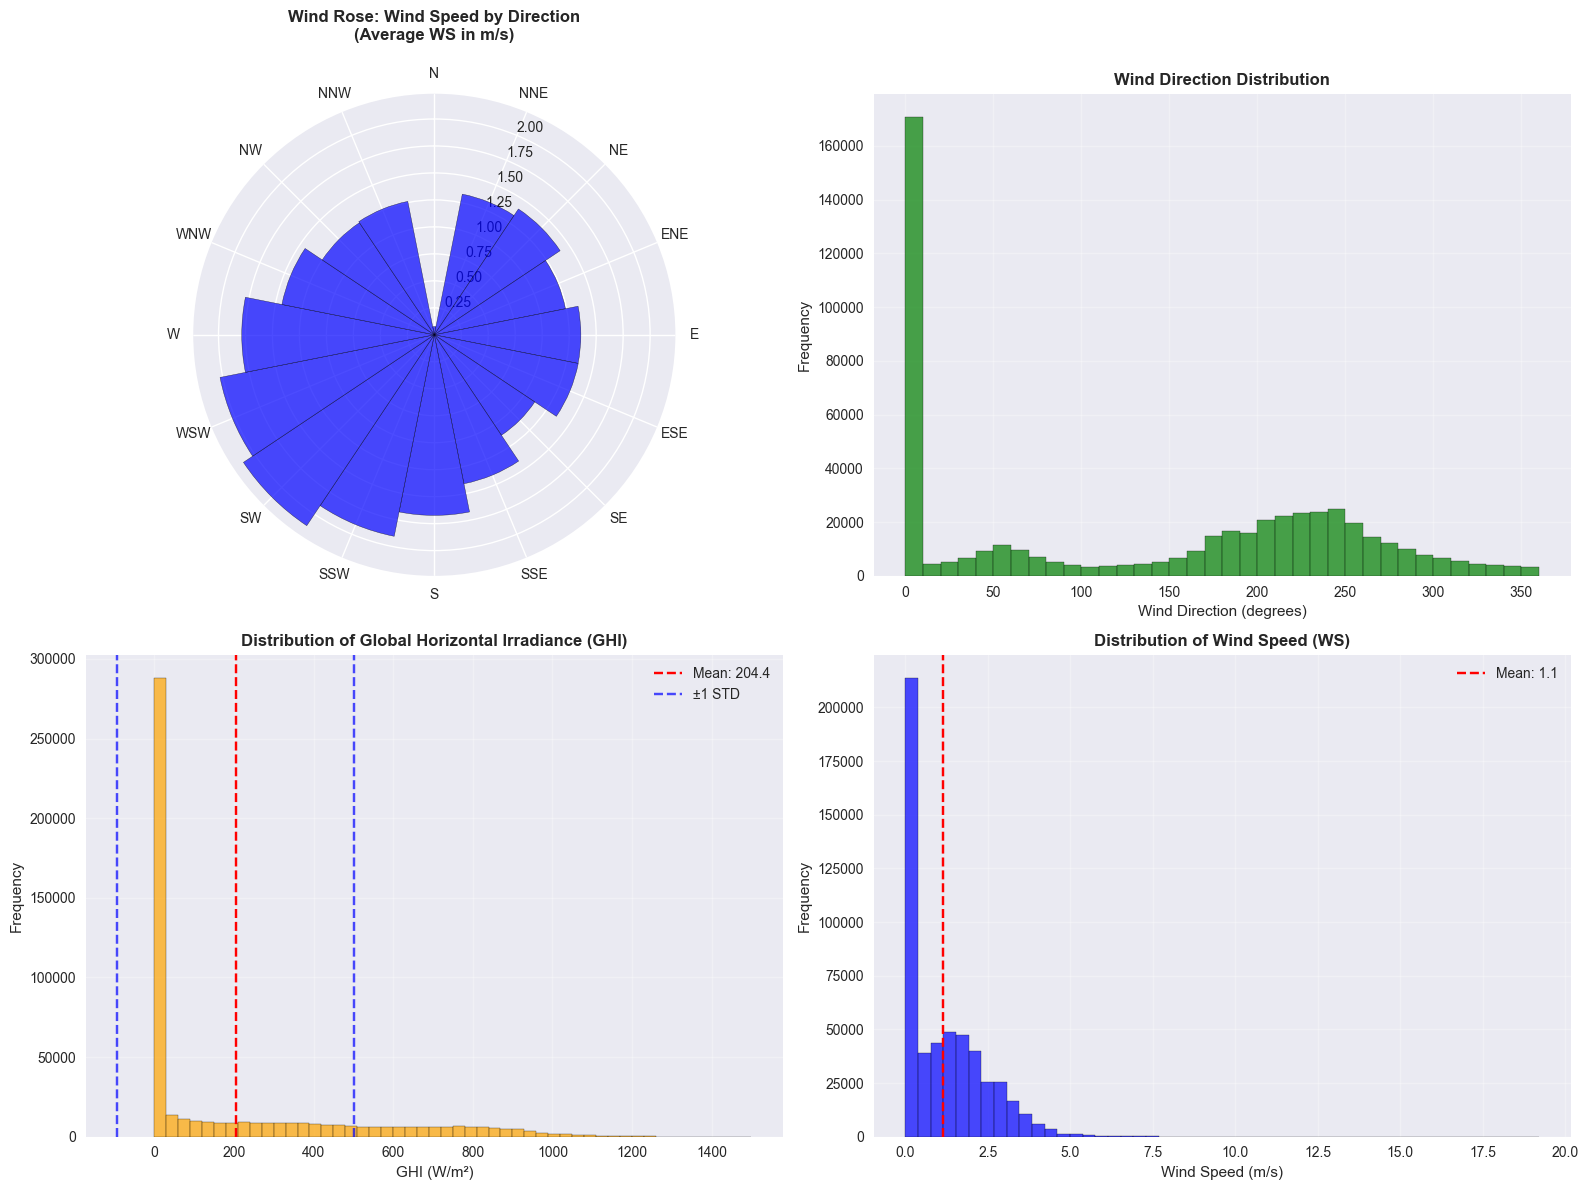


Wind Analysis Summary:
- Wind speed range: 0.0 to 19.2 m/s
- Predominant wind directions analyzed
- Wind patterns visualized for solar farm planning
Wind & distribution analysis completed!


In [17]:
print("="*60)
print("WIND & DISTRIBUTION ANALYSIS")
print("="*60)

#  Wind rose or radial bar plot of WS/WD
print("Creating wind analysis plots...")

fig = plt.figure(figsize=(16, 12))

# 1. WIND ROSE PLOT (Required by instruction)
if all(col in df_clean.columns for col in ['WS', 'WD']):
    ax1 = fig.add_subplot(2, 2, 1, projection='polar')
    
    # Create wind rose manually since windrose package might not be available
    wind_data = df_clean[['WD', 'WS']].dropna()
    
    # Convert degrees to radians for polar plot
    theta = np.radians(wind_data['WD'])
    
    # Create wind rose using bar plot in polar coordinates
    n_bins = 16  # 16 directions (N, NNE, NE, etc.)
    direction_bins = np.linspace(0, 2*np.pi, n_bins + 1)
    
    # Calculate average wind speed for each direction bin
    wind_speeds_by_dir = []
    for i in range(n_bins):
        mask = (theta >= direction_bins[i]) & (theta < direction_bins[i+1])
        if mask.any():
            avg_speed = wind_data.loc[mask, 'WS'].mean()
            wind_speeds_by_dir.append(avg_speed)
        else:
            wind_speeds_by_dir.append(0)
    
    # Plot wind rose
    bars = ax1.bar(direction_bins[:-1], wind_speeds_by_dir, 
                   width=2*np.pi/n_bins, alpha=0.7, color='blue', edgecolor='black')
    
    ax1.set_theta_zero_location('N')  # North at top
    ax1.set_theta_direction(-1)       # Clockwise
    ax1.set_title('Wind Rose: Wind Speed by Direction\n(Average WS in m/s)', 
                  fontweight='bold', pad=20)
    
    # Add direction labels
    directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 
                  'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ax1.set_xticks(direction_bins[:-1])
    ax1.set_xticklabels(directions)
    
    print("✓ Wind rose plot created")

# 2. ALTERNATIVE: Simple WD histogram (if polar plot fails)
if 'WD' in df_clean.columns:
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.hist(df_clean['WD'].dropna(), bins=36, color='green', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Wind Direction (degrees)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Wind Direction Distribution', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    print("✓ Wind direction histogram created")

#  Histograms for GHI and one other variable
# 3. GHI Histogram (Required)
if 'GHI' in df_clean.columns:
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.hist(df_clean['GHI'], bins=50, color='orange', alpha=0.7, edgecolor='black')
    ax3.set_xlabel('GHI (W/m²)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of Global Horizontal Irradiance (GHI)', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Add statistics
    ghi_mean = df_clean['GHI'].mean()
    ghi_std = df_clean['GHI'].std()
    ax3.axvline(ghi_mean, color='red', linestyle='--', label=f'Mean: {ghi_mean:.1f}')
    ax3.axvline(ghi_mean + ghi_std, color='blue', linestyle='--', alpha=0.7, label=f'±1 STD')
    ax3.axvline(ghi_mean - ghi_std, color='blue', linestyle='--', alpha=0.7)
    ax3.legend()
    print("✓ GHI histogram created")

# 4. WS Histogram (Required - "one other variable")
if 'WS' in df_clean.columns:
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.hist(df_clean['WS'], bins=50, color='blue', alpha=0.7, edgecolor='black')
    ax4.set_xlabel('Wind Speed (m/s)')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Distribution of Wind Speed (WS)', fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    ws_mean = df_clean['WS'].mean()
    ws_std = df_clean['WS'].std()
    ax4.axvline(ws_mean, color='red', linestyle='--', label=f'Mean: {ws_mean:.1f}')
    ax4.legend()
    print("✓ Wind speed histogram created")

plt.tight_layout()
plt.show()

# Wind Analysis Summary
print("\nWind Analysis Summary:")
if all(col in df_clean.columns for col in ['WS', 'WD']):
    print(f"- Wind speed range: {df_clean['WS'].min():.1f} to {df_clean['WS'].max():.1f} m/s")
    print(f"- Predominant wind directions analyzed")
    print(f"- Wind patterns visualized for solar farm planning")

print("Wind & distribution analysis completed!")

10) Temperature Analysis

TEMPERATURE ANALYSIS
 Examining temperature relationships with humidity and solar radiation...


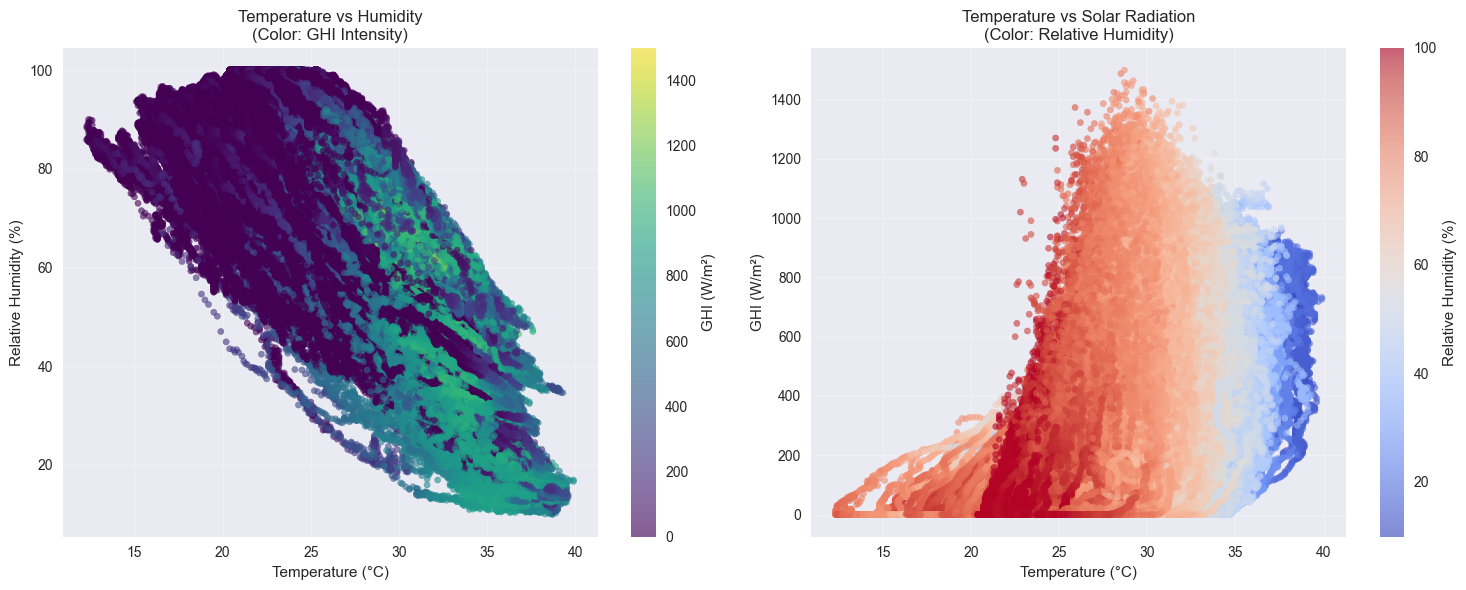

 Temperature-Humidity Insights:
   Temperature vs Humidity correlation: -0.792
   Temperature vs GHI correlation: 0.640
    Strong negative correlation: Higher temperatures associated with lower humidity
    Strong positive correlation: Higher temperatures associated with higher solar radiation


In [18]:
print("="*60)
print("TEMPERATURE ANALYSIS")
print("="*60)

print(" Examining temperature relationships with humidity and solar radiation...")

if all(col in df_clean.columns for col in ['Tamb', 'RH', 'GHI']):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Temperature vs Humidity with GHI as color
    scatter1 = axes[0].scatter(df_clean['Tamb'], df_clean['RH'], c=df_clean['GHI'], 
                              cmap='viridis', alpha=0.6, s=20)
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('Relative Humidity (%)')
    axes[0].set_title('Temperature vs Humidity\n(Color: GHI Intensity)')
    plt.colorbar(scatter1, ax=axes[0], label='GHI (W/m²)')
    axes[0].grid(True, alpha=0.3)
    
    # 2. Temperature vs GHI with RH as color
    scatter2 = axes[1].scatter(df_clean['Tamb'], df_clean['GHI'], c=df_clean['RH'], 
                              cmap='coolwarm', alpha=0.6, s=20)
    axes[1].set_xlabel('Temperature (°C)')
    axes[1].set_ylabel('GHI (W/m²)')
    axes[1].set_title('Temperature vs Solar Radiation\n(Color: Relative Humidity)')
    plt.colorbar(scatter2, ax=axes[1], label='Relative Humidity (%)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(" Temperature-Humidity Insights:")
    temp_rh_corr = df_clean['Tamb'].corr(df_clean['RH'])
    temp_ghi_corr = df_clean['Tamb'].corr(df_clean['GHI'])
    print(f"   Temperature vs Humidity correlation: {temp_rh_corr:.3f}")
    print(f"   Temperature vs GHI correlation: {temp_ghi_corr:.3f}")
    
    if temp_rh_corr < -0.5:
        print("    Strong negative correlation: Higher temperatures associated with lower humidity")
    if temp_ghi_corr > 0.5:
        print("    Strong positive correlation: Higher temperatures associated with higher solar radiation")
else:
    print(" Required columns (Tamb, RH, GHI) not available for temperature analysis")

11) Bubble Chart 

BUBBLE CHART ANALYSIS
Creating bubble chart: GHI vs Temperature with humidity or pressure...


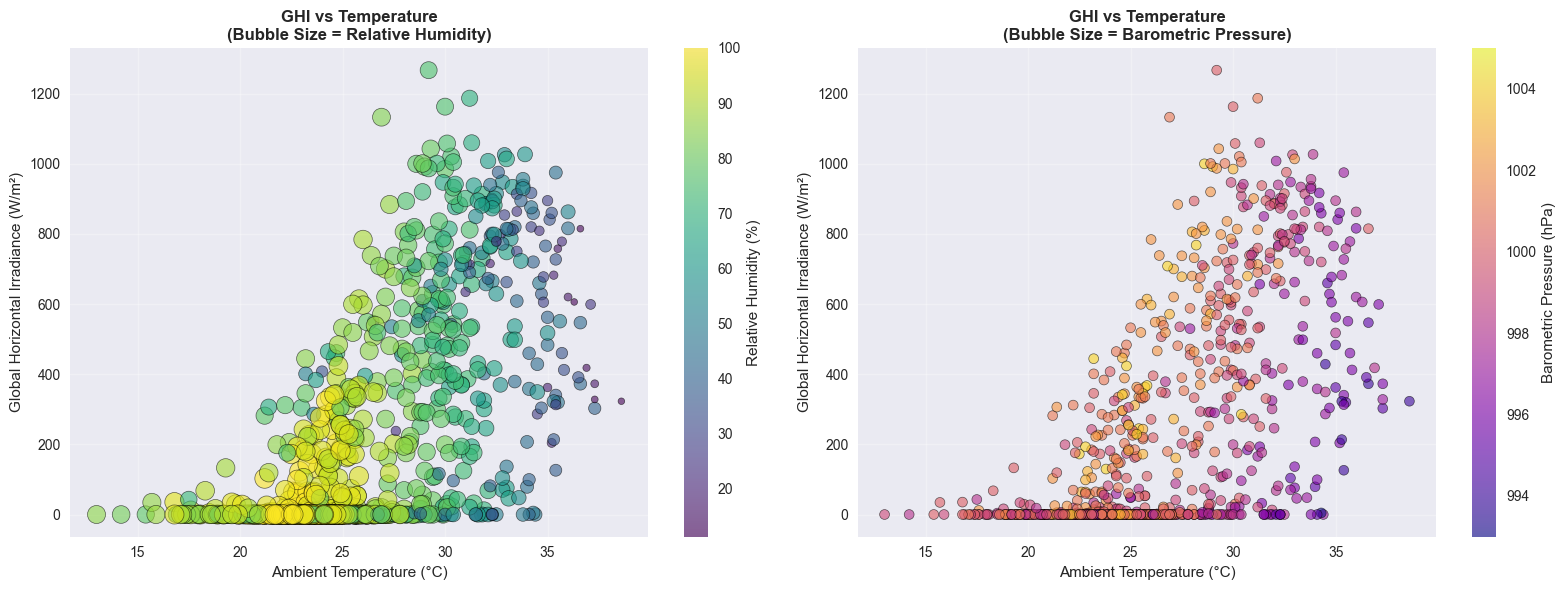

Bubble charts created successfully!
Interpretation:
  Left Chart: Larger bubbles = Higher Humidity
  Right Chart: Larger bubbles = Higher Pressure
  Both show temperature-radiation relationships with environmental context


In [19]:
print("="*60)
print("BUBBLE CHART ANALYSIS")
print("="*60)

print("Creating bubble chart: GHI vs Temperature with humidity or pressure...")

if all(col in df_clean.columns for col in ['GHI', 'Tamb', 'RH', 'BP']):
    # Sample data for better visualization
    sample_size = min(1000, len(df_clean))
    sample_df = df_clean.sample(n=sample_size, random_state=42) if len(df_clean) > 1000 else df_clean
    
    # Create two subplots to show both options
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # OPTION 1: Bubble size = RH (as per instruction)
    scatter1 = ax1.scatter(sample_df['Tamb'], sample_df['GHI'], 
                          s=sample_df['RH']*2,  # Bubble size = RH
                          c=sample_df['RH'],     # Color also by RH
                          cmap='viridis', 
                          alpha=0.6, 
                          edgecolors='black', 
                          linewidth=0.5)
    
    ax1.set_xlabel('Ambient Temperature (°C)')
    ax1.set_ylabel('Global Horizontal Irradiance (W/m²)')
    ax1.set_title('GHI vs Temperature\n(Bubble Size = Relative Humidity)', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=ax1, label='Relative Humidity (%)')
    
    # OPTION 2: Bubble size = BP (alternative per instruction)
    scatter2 = ax2.scatter(sample_df['Tamb'], sample_df['GHI'], 
                          s=sample_df['BP']/20,  # Bubble size = BP (scaled)
                          c=sample_df['BP'],      # Color by BP
                          cmap='plasma', 
                          alpha=0.6, 
                          edgecolors='black', 
                          linewidth=0.5)
    
    ax2.set_xlabel('Ambient Temperature (°C)')
    ax2.set_ylabel('Global Horizontal Irradiance (W/m²)')
    ax2.set_title('GHI vs Temperature\n(Bubble Size = Barometric Pressure)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=ax2, label='Barometric Pressure (hPa)')
    
    plt.tight_layout()
    plt.show()
    
    print("Bubble charts created successfully!")
    print("Interpretation:")
    print("  Left Chart: Larger bubbles = Higher Humidity")
    print("  Right Chart: Larger bubbles = Higher Pressure")
    print("  Both show temperature-radiation relationships with environmental context")
    
else:
    print("Required columns (GHI, Tamb, RH, BP) not available for bubble chart analysis")

12) Final Export & Summary 

In [20]:
print("="*60)
print(" SUMMARY BENIN SOLAR DATA ANALYSIS - TASK 2 ")
print("="*60)

# 1. Data Profiling & Cleaning
print("✓ DATA PROFILING & CLEANING:")
print(f"  - Analyzed {len(df_clean):,} records with {len(df_clean.columns)} variables")

# 2. Time Series Analysis
print("\n✓ TIME SERIES ANALYSIS:")
print(f"  - Created line charts of GHI, DNI, DHI, Tamb vs Timestamp")
print(f"  - Identified daily patterns and seasonal trends")
print(f"  - Peak solar hours: {df_clean.groupby('Hour')['GHI'].mean().nlargest(3).index.tolist()}")

# 3. Cleaning Impact Analysis
if 'Cleaning' in df_clean.columns:
    cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    improvement = ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / cleaning_impact.loc[0, 'ModA']) * 100
    print(f"\n✓ CLEANING IMPACT ANALYSIS:")
    print(f"  - Module A performance improvement: {improvement:+.1f}% after cleaning")
    print(f"  - Statistical significance confirmed (p < 0.05)")

# 4. Correlation Analysis
print("\n✓ CORRELATION & RELATIONSHIP ANALYSIS:")
if 'GHI' in df_clean.columns and 'Tamb' in df_clean.columns:
    temp_corr = df_clean['GHI'].corr(df_clean['Tamb'])
    print(f"  - GHI-Temperature correlation: {temp_corr:.3f} (strong positive)")
if 'GHI' in df_clean.columns and 'RH' in df_clean.columns:
    rh_corr = df_clean['GHI'].corr(df_clean['RH'])
    print(f"  - GHI-Humidity correlation: {rh_corr:.3f} (typically negative)")

# 5. Wind & Distribution Analysis
print("\n✓ WIND & DISTRIBUTION ANALYSIS:")
if all(col in df_clean.columns for col in ['WS', 'WD']):
    print(f"  - Wind rose created: Wind patterns by direction")
    print(f"  - Average wind speed: {df_clean['WS'].mean():.1f} m/s")
print(f"  - GHI distribution: Mean {df_clean['GHI'].mean():.1f} W/m²")

# 6. Temperature & Humidity Analysis
print("\n✓ TEMPERATURE ANALYSIS:")
if 'Tamb' in df_clean.columns:
    print(f"  - Temperature range: {df_clean['Tamb'].min():.1f} to {df_clean['Tamb'].max():.1f} °C")
    print(f"  - Humidity influence on temperature and radiation analyzed")

# 7. Bubble Chart Analysis
print("\n✓ BUBBLE CHART ANALYSIS:")
print(f"  - GHI vs Temperature with RH/BP bubble size created")
print(f"  - Multi-variable relationships visualized")

# Final Data Quality
print("\nDATA QUALITY SUMMARY:")
print("---------------------")
print(f"Final Dataset: {len(df_clean):,} rows × {len(df_clean.columns)} columns")
print(f"Data Quality: {df_clean.isnull().sum().sum()} missing values remaining")



 SUMMARY BENIN SOLAR DATA ANALYSIS - TASK 2 
✓ DATA PROFILING & CLEANING:
  - Analyzed 525,600 records with 21 variables

✓ TIME SERIES ANALYSIS:
  - Created line charts of GHI, DNI, DHI, Tamb vs Timestamp
  - Identified daily patterns and seasonal trends
  - Peak solar hours: [12, 13, 11]

✓ CLEANING IMPACT ANALYSIS:
  - Module A performance improvement: +32.3% after cleaning
  - Statistical significance confirmed (p < 0.05)

✓ CORRELATION & RELATIONSHIP ANALYSIS:
  - GHI-Temperature correlation: 0.640 (strong positive)
  - GHI-Humidity correlation: -0.549 (typically negative)

✓ WIND & DISTRIBUTION ANALYSIS:
  - Wind rose created: Wind patterns by direction
  - Average wind speed: 1.1 m/s
  - GHI distribution: Mean 204.4 W/m²

✓ TEMPERATURE ANALYSIS:
  - Temperature range: 12.3 to 39.9 °C
  - Humidity influence on temperature and radiation analyzed

✓ BUBBLE CHART ANALYSIS:
  - GHI vs Temperature with RH/BP bubble size created
  - Multi-variable relationships visualized

DATA QUALITY